In [69]:
#importing all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix 
from sklearn.impute import SimpleImputer

In [70]:
#load the dataset

data=pd.read_csv('data_file_disease.csv')
data.head()

,date,country,id,active,age,alco,ap_hi,ap_lo,cholesterol,gender,gluc,height,occupation,smoke,weight,disease
0,03-05-2021,Indonesia,0,1,18393,0,110,80,1,2,1,168,Architect,0,62.0,0
1,05-08-2021,Malaysia,1,1,20228,0,140,90,3,1,1,156,Accountant,0,85.0,1
2,13-11-2022,Indonesia,2,0,18857,0,130,70,3,1,1,165,Chef,0,64.0,1
3,31-10-2018,Singapore,3,1,17623,0,150,100,1,2,1,169,Lawyer,0,82.0,1
4,25-09-2020,Singapore,4,0,17474,0,100,60,1,1,1,156,Architect,0,56.0,0


In [71]:
# Data exploration (EDA)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         70000 non-null  object 
 1   country      70000 non-null  object 
 2   id           70000 non-null  int64  
 3   active       70000 non-null  int64  
 4   age          70000 non-null  int64  
 5   alco         70000 non-null  int64  
 6   ap_hi        70000 non-null  int64  
 7   ap_lo        70000 non-null  int64  
 8   cholesterol  70000 non-null  int64  
 9   gender       70000 non-null  int64  
 10  gluc         70000 non-null  int64  
 11  height       70000 non-null  int64  
 12  occupation   70000 non-null  object 
 13  smoke        70000 non-null  int64  
 14  weight       70000 non-null  float64
 15  disease      70000 non-null  int64  
dtypes: float64(1), int64(12), object(3)
memory usage: 8.5+ MB
None


In [72]:
#summary statistics
print(data.describe())

                 id        active           age          alco         ap_hi  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean   49972.419900      0.803729  19468.865814      0.053771    128.817286   
std    28851.302323      0.397179   2467.251667      0.225568    154.011419   
min        0.000000      0.000000  10798.000000      0.000000   -150.000000   
25%    25006.750000      1.000000  17664.000000      0.000000    120.000000   
50%    50001.500000      1.000000  19703.000000      0.000000    120.000000   
75%    74889.250000      1.000000  21327.000000      0.000000    140.000000   
max    99999.000000      1.000000  23713.000000      1.000000  16020.000000   

              ap_lo   cholesterol        gender          gluc        height  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean      96.630414      1.366871      1.349571      1.226457    164.359229   
std      188.472530      0.680250      0.476838    

In [73]:
#checking missing values
print(data.isnull().sum())

date           0
country        0
id             0
active         0
age            0
alco           0
ap_hi          0
ap_lo          0
cholesterol    0
gender         0
gluc           0
height         0
occupation     0
smoke          0
weight         0
disease        0
dtype: int64


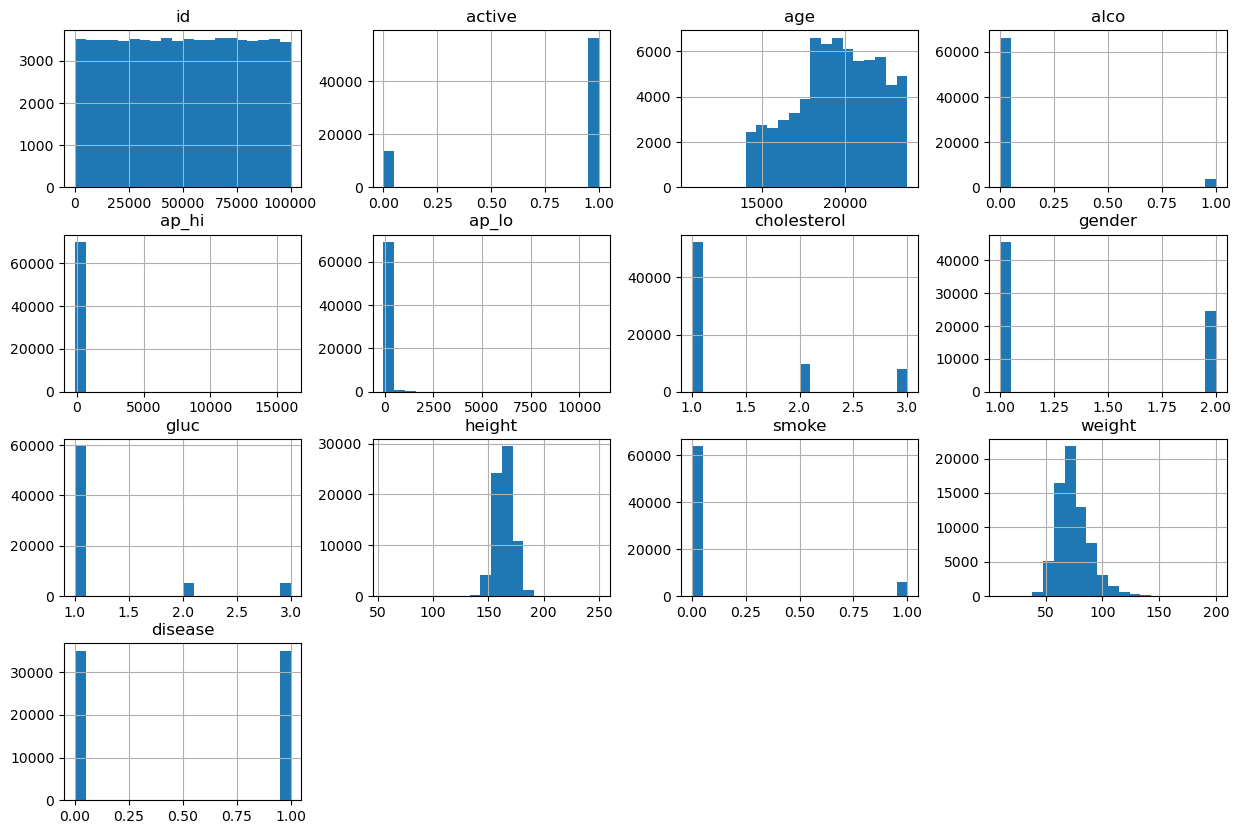

In [74]:
# Plot histograms for each numeric feature
data.hist(bins=20, figsize=(15, 10))
plt.show()

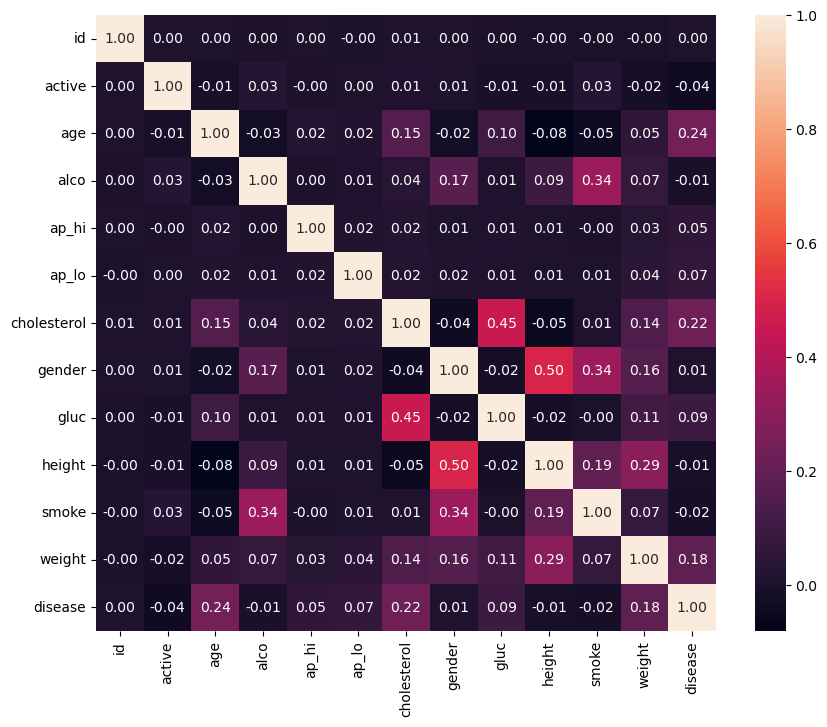

In [75]:
#correlation matrix
# Select only numeric columns for correlation calculation
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Plot the heatmap using only numeric data
plt.figure(figsize=(10,8))
sns.heatmap(numeric_data.corr(), annot=True, fmt=".2f")
plt.show()

In [76]:
## Check unique values in categorical columns
print(data['gender'].value_counts())
print(data['cholesterol'].value_counts())
print(data['gluc'].value_counts())

gender
1    45530
2    24470
Name: count, dtype: int64
cholesterol
1    52385
2     9549
3     8066
Name: count, dtype: int64
gluc
1    59479
3     5331
2     5190
Name: count, dtype: int64


In [78]:
# Handle missing data if any
imputer = SimpleImputer(strategy="mean")
data['weight'] = imputer.fit_transform(data[['weight']])

In [79]:
# Convert categorical columns to numerical

#gender mapping
data['gender'] = data['gender'].map({1: 'Male', 2: 'Female'})
#one hot encode necessary categorical values
data = pd.get_dummies(data, columns=['gender', 'cholesterol', 'gluc'])




In [80]:
# Split the data into features and target
X = data.drop(columns=['disease', 'date', 'country', 'id', 'occupation'])
y = data['disease']



In [81]:
X.head()

,active,age,alco,ap_hi,ap_lo,height,smoke,weight,gender_Female,gender_Male,cholesterol_1,cholesterol_2,cholesterol_3,gluc_1,gluc_2,gluc_3
0,1,18393,0,110,80,168,0,62.0,True,False,True,False,False,True,False,False
1,1,20228,0,140,90,156,0,85.0,False,True,False,False,True,True,False,False
2,0,18857,0,130,70,165,0,64.0,False,True,False,False,True,True,False,False
3,1,17623,0,150,100,169,0,82.0,True,False,True,False,False,True,False,False
4,0,17474,0,100,60,156,0,56.0,False,True,True,False,False,True,False,False


In [82]:
#Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [87]:
# Feature scaling
scaler = StandardScaler()
#features = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']
#data[features] = scaler.fit_transform(data[features])

X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [88]:
# LOGISTIC REGRESSION

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train,y_train)
logreg_pred=logreg.predict(X_test)
logreg_accuracy=accuracy_score(y_test,logreg_pred)

In [89]:
# display accuracy and performance metrics

print(f'Logistic Regression Accuracy: {logreg_accuracy*100:.2f}')
print('\nLogistic Regression Classification Report: ')
print(classification_report(y_test,logreg_pred))



Logistic Regression Accuracy: 72.10

Logistic Regression Classification Report: 
              precision    recall  f1-score   support

           0       0.70      0.77      0.73     10539
           1       0.74      0.67      0.71     10461

    accuracy                           0.72     21000
   macro avg       0.72      0.72      0.72     21000
weighted avg       0.72      0.72      0.72     21000



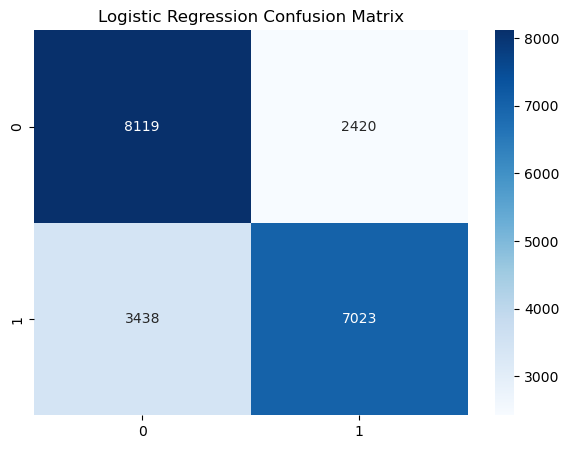

In [90]:
#confusion matrix

plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y_test,logreg_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

In [91]:
# BUILDING MODEL USING KNN ALGORITHM

from sklearn.neighbors import KNeighborsClassifier

In [92]:
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
knn_pred=knn.predict(X_test)
knn_accuracy=accuracy_score(y_test,knn_pred)

In [93]:
# Display accuracy and performance metrics

print(f'K-Nearest Neighbors Accuracy: {knn_accuracy*100:.2f}')
print('\nK-Nearest Neighbors Classification Report:')
print(classification_report(y_test,knn_pred))

K-Nearest Neighbors Accuracy: 64.69

K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.67      0.66     10539
           1       0.65      0.62      0.64     10461

    accuracy                           0.65     21000
   macro avg       0.65      0.65      0.65     21000
weighted avg       0.65      0.65      0.65     21000



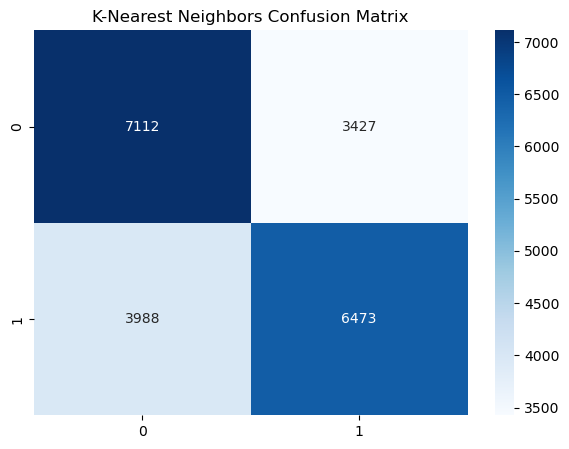

In [94]:
#Confusion matrix
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y_test,knn_pred), annot=True, fmt='d', cmap='Blues')
plt.title('K-Nearest Neighbors Confusion Matrix')
plt.show()

In [95]:
# DECISION TREE ALGORITHM

from sklearn.tree import DecisionTreeClassifier

In [96]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train,y_train)
decision_tree_pred=decision_tree.predict(X_test)
decision_tree_accuracy=accuracy_score(y_test,decision_tree_pred)

In [97]:
#display accuracy and performance metrics

print(f'Decision Tree Accuracy: {decision_tree_accuracy*100:.2f}')
print('\nDecision Tree Classification Report:')
print(classification_report(y_test,decision_tree_pred))

Decision Tree Accuracy: 63.09

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.64      0.63     10539
           1       0.63      0.62      0.63     10461

    accuracy                           0.63     21000
   macro avg       0.63      0.63      0.63     21000
weighted avg       0.63      0.63      0.63     21000



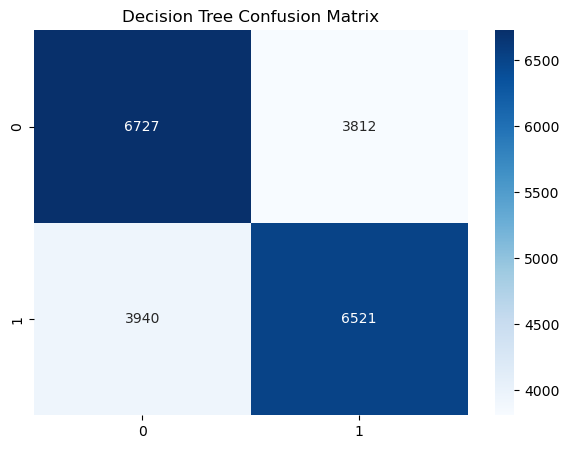

In [98]:
#Confusion matrix
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y_test,decision_tree_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Decision Tree Confusion Matrix')
plt.show()


In [104]:
#building model using SUPPORT VECTOR MACHINE ALGO

from sklearn.svm import SVC 
#svc is supoort vector classifier


In [102]:
svm=SVC()
svm.fit(X_train, y_train)
svm_pred=svm.predict(X_test)
svm_accuracy=accuracy_score(y_test,svm_pred)

In [103]:
#display accuracy and performance metrics

print(f'Support Vector Machine Accuracy: {svm_accuracy*100:.2f}')
print('\nSupport Vector Machine Classification Report:')
print(classification_report(y_test,svm_pred))

Support Vector Machine Accuracy: 72.37

Support Vector Machine Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.76      0.73     10539
           1       0.74      0.69      0.71     10461

    accuracy                           0.72     21000
   macro avg       0.72      0.72      0.72     21000
weighted avg       0.72      0.72      0.72     21000



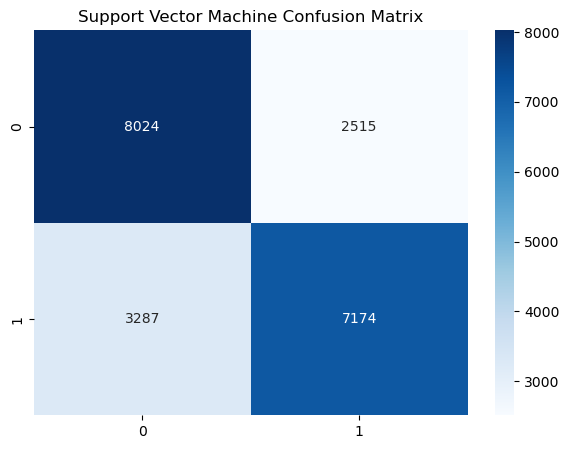

In [105]:
#Confusion matrix
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y_test,svm_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Support Vector Machine Confusion Matrix')
plt.show()


In [106]:
#MODEL COMPARISION

model_accuracies={
    'Logistic Regression': logreg_accuracy,
    'K-Nearest Neighbors': knn_accuracy,
    'Decision Tree': decision_tree_accuracy,
    'Support Vector Machine': svm_accuracy
}


In [107]:
#Display accuracies

for model, accuracy in model_accuracies.items():
    print(f'{model} Accuracy: {accuracy*100:.2f} %')

Logistic Regression Accuracy: 72.10 %
K-Nearest Neighbors Accuracy: 64.69 %
Decision Tree Accuracy: 63.09 %
Support Vector Machine Accuracy: 72.37 %


In [110]:
# RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier

#initialize
random_forest = RandomForestClassifier()

#train
random_forest.fit(X_train, y_train)

RandomForestClassifier()

In [113]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define evaluate_model function to evaluate models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")

# Evaluate each model
print("Logistic Regression Performance:")
evaluate_model(logreg, X_test, y_test)

print("\nK-Nearest Neighbors Performance:")
evaluate_model(knn, X_test, y_test)

print("\nDecision Tree Performance:")
evaluate_model(decision_tree, X_test, y_test)

print("\nSupport Vector Machine Performance:")
evaluate_model(svm, X_test, y_test)

print("\nRandom Forest Performance:")
evaluate_model(random_forest, X_test, y_test)


Logistic Regression Performance:
Accuracy: 0.721047619047619
Precision: 0.7437255109604999
Recall: 0.6713507312876398
F1 Score: 0.7056872990353698

K-Nearest Neighbors Performance:
Accuracy: 0.6469047619047619
Precision: 0.6538383838383839
Recall: 0.6187744957461045
F1 Score: 0.6358233878493198

Decision Tree Performance:
Accuracy: 0.6308571428571429
Precision: 0.6310848737056034
Recall: 0.6233629672115476
F1 Score: 0.6272001538905454

Support Vector Machine Performance:
Accuracy: 0.7237142857142858
Precision: 0.7404272886778821
Recall: 0.6857852977726795
F1 Score: 0.7120595533498759

Random Forest Performance:
Accuracy: 0.7127619047619047
Precision: 0.7188889987150341
Recall: 0.6952490201701558
F1 Score: 0.7068714160754204


In [114]:
# Feature importance from the Random Forest model
importances = random_forest.feature_importances_
feature_names = X.columns

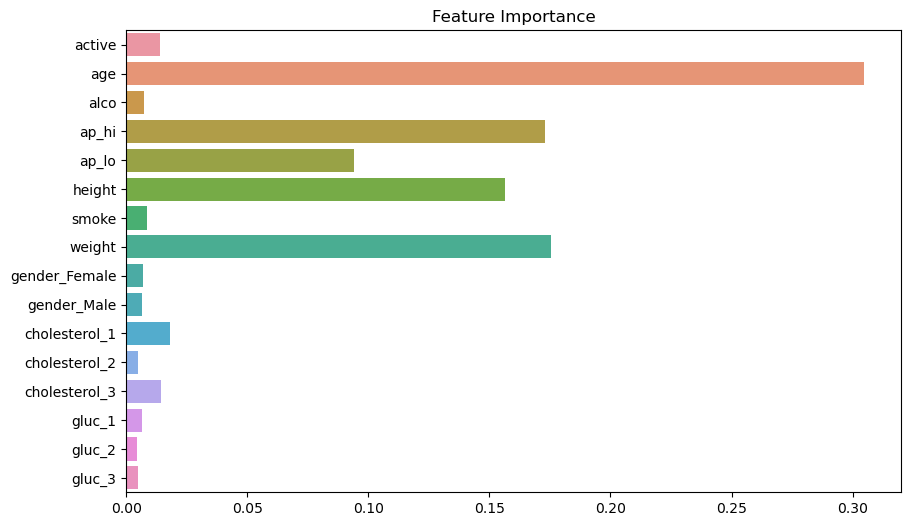

In [115]:
# Plot the feature importances
plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=feature_names)
plt.title('Feature Importance')
plt.show()

In [116]:
# Insights
print("Most important factors in predicting heart disease based on the Random Forest model:")
sorted(zip(feature_names, importances), key=lambda x: x[1], reverse=True)


Most important factors in predicting heart disease based on the Random Forest model:


[('age', 0.30485326265566853),
 ('weight', 0.1753708356414328),
 ('ap_hi', 0.17289001881000043),
 ('height', 0.1564728132476034),
 ('ap_lo', 0.09407967633493376),
 ('cholesterol_1', 0.018223598084792514),
 ('cholesterol_3', 0.014292778268871953),
 ('active', 0.013870918811351551),
 ('smoke', 0.008596129073121706),
 ('alco', 0.007259858778410341),
 ('gender_Female', 0.006727716438833669),
 ('gender_Male', 0.0066477785714710805),
 ('gluc_1', 0.006506634638402164),
 ('cholesterol_2', 0.004880579426762325),
 ('gluc_3', 0.004687391389813316),
 ('gluc_2', 0.0046400098285305546)]

In [122]:
import numpy as np
import pickle

#using the trained Random Forest model for prediction
# Saving the Random Forest model and scaler after training
with open('random_forest_model.pkl', 'wb') as model_file:
    pickle.dump(random_forest, model_file)

with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

print("Model and scaler saved.")



Model and scaler saved.


In [138]:
import numpy as np
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')

# Function to take user input for all the features, including occupation and active
def get_user_input():
    print("Please provide the following information:")
    age = float(input("Age (years): "))
    ap_hi = float(input("Systolic Blood Pressure (ap_hi): "))
    ap_lo = float(input("Diastolic Blood Pressure (ap_lo): "))
    cholesterol = int(input("Cholesterol level (1 for normal, 2 for above normal, 3 for well above normal): "))
    gluc = int(input("Glucose level (1 for normal, 2 for above normal, 3 for well above normal): "))
    weight = float(input("Weight (kg): "))
    height = float(input("Height (cm): "))
    gender = int(input("Gender (1 for Male, 2 for Female): "))
    smoke = int(input("Do you smoke? (0 for no, 1 for yes): "))
    active = int(input("Are you physically active? (0 for no, 1 for yes): "))
    
    # Occupation input
    occupation = input("Occupation (Architect, Accountant, Chef, Lawyer, etc.): ").strip().lower()
    
    # One-hot encoding for gender (Male = [1, 0], Female = [0, 1])
    if gender == 1:
        gender_male, gender_female = 1, 0
    else:
        gender_male, gender_female = 0, 1
    
    # One-hot encoding for cholesterol level
    cholesterol_1, cholesterol_2, cholesterol_3 = 0, 0, 0
    if cholesterol == 1:
        cholesterol_1 = 1
    elif cholesterol == 2:
        cholesterol_2 = 1
    elif cholesterol == 3:
        cholesterol_3 = 1
    
    # One-hot encoding for glucose level
    gluc_1, gluc_2, gluc_3 = 0, 0, 0
    if gluc == 1:
        gluc_1 = 1
    elif gluc == 2:
        gluc_2 = 1
    elif gluc == 3:
        gluc_3 = 1

    # One-hot encoding for occupation
    occupation_architect, occupation_accountant, occupation_chef, occupation_lawyer = 0, 0, 0, 0
    if occupation == 'architect':
        occupation_architect = 1
    elif occupation == 'accountant':
        occupation_accountant = 1
    elif occupation == 'chef':
        occupation_chef = 1
    elif occupation == 'lawyer':
        occupation_lawyer = 1
    else:
        print("Okay")

    # Create an array with all the features in the same order as in your model training
    user_data = np.array([[age, height, weight, ap_hi, ap_lo, smoke, active, 
                           gender_male, gender_female, 
                           cholesterol_1,cholesterol_2,gluc,
                           occupation_architect, occupation_accountant, occupation_chef,occupation_lawyer]])
    
    return user_data

# Get the user input
user_data = get_user_input()

# Scale the user input data (using the scaler from earlier)
user_data_scaled = scaler.transform(user_data)

# Make a prediction with the trained model
prediction = random_forest.predict(user_data_scaled)

# Output the result
if prediction[0] == 1:
    print("The model predicts that the person may have heart disease (1).")
else:
    print("The model predicts that the person may NOT have heart disease (0).")


Please provide the following information:
Age (years): 1
Systolic Blood Pressure (ap_hi): 1
Diastolic Blood Pressure (ap_lo): 1
Cholesterol level (1 for normal, 2 for above normal, 3 for well above normal): 1
Glucose level (1 for normal, 2 for above normal, 3 for well above normal): 1
Weight (kg): 1
Height (cm): 1
Gender (1 for Male, 2 for Female): 1
Do you smoke? (0 for no, 1 for yes): 1
Are you physically active? (0 for no, 1 for yes): 1
Occupation (Architect, Accountant, Chef, Lawyer, etc.): Teacher
Okay
The model predicts that the person may NOT have heart disease (0).
